### Ejercicio 12: Refinería

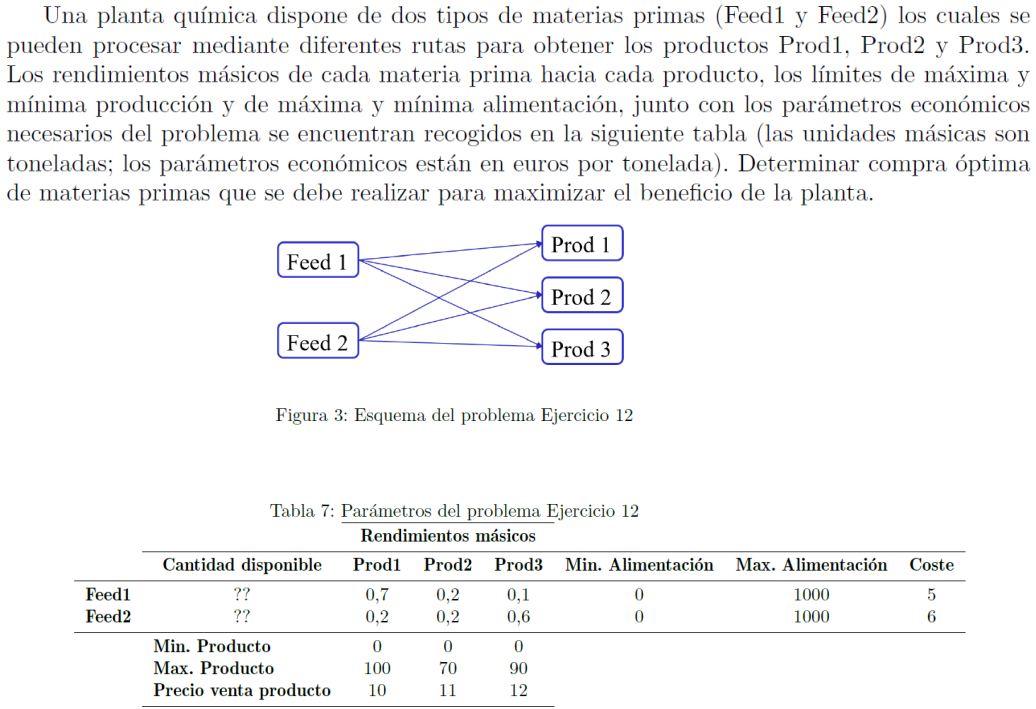

In [7]:
from IPython.display import Image 
Image(filename='img_enun/E12.png')

In [8]:
from pyomo.environ import *
model = ConcreteModel()

#### Variables

In [9]:
model.Feed1 = Var(bounds = (0,1000) )
model.Feed2 = Var(bounds = (0,1000))
model.Prod1 = Var(bounds = (0,100))
model.Prod2 = Var(bounds = (0,70))
model.Prod3 = Var(bounds = (0,90))

#### Objetivo

In [10]:
model.contam = Objective(expr = model.Prod1*10+model.Prod2*11+model.Prod3*12-model.Feed1*5-model.Feed2*6,
                         sense=maximize)

#### Restricciones

In [11]:
model.P1 = Constraint(expr = model.Prod1-0.7*model.Feed1-0.2*model.Feed2 == 0)
model.P2 = Constraint(expr = model.Prod2-0.2*model.Feed1-0.2*model.Feed2 == 0)
model.P3 = Constraint(expr = model.Prod3-0.1*model.Feed1-0.6*model.Feed2 == 0)

#### Solución

In [12]:
results = SolverFactory('glpk').solve(model)
model.pprint()
results.write()  

5 Var Declarations
    Feed1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 : 105.0 :  1000 : False : False :  Reals
    Feed2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 : 132.5 :  1000 : False : False :  Reals
    Prod1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 : 100.0 :   100 : False : False :  Reals
    Prod2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  47.5 :    70 : False : False :  Reals
    Prod3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  90.0 :    90 : False : False :  Reals

1 Objective Declarations
    contam : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 10*Prod1 + 11*Prod2 + 12*Prod3 - 5*Feed1 - 6*Feed2

3 